<a href="https://colab.research.google.com/github/OlegV12/Data-Analysis-Algorithms/blob/Lesson_2/Alg_Lesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd


In [ ]:
data, target, coef = datasets.make_regression(n_samples=3000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 3, coef = True, random_state = 2)

In [ ]:
data.shape


(3000, 2)

In [ ]:
target.shape

(3000,)

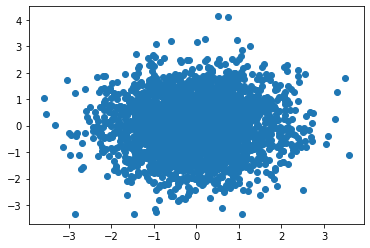

In [ ]:
plt.scatter(data.reshape(2, 3000)[0], data.reshape(2, 3000)[1])

In [ ]:
means = np.mean(data, axis=0)
means

array([ 0.01559901, -0.06711939])

In [ ]:
data_max = np.max(data, axis=0)
data_min = np.min(data, axis=0)
data_max , data_min

(array([4.10869262, 4.13336231]), array([-3.58235851, -3.33496522]))

In [ ]:
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [ ]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [ ]:
def stohastic(data, eta = 0.4, max_iter = 35000, min_weight_dist = 1e-8, 
              weight_dist = np.inf, lambda_value=0.001):
  w = np.zeros(2)
  w_list = [w.copy()]
  errors = []
  iter_num = 0
 
  np.random.seed(1234)
 
  while weight_dist > min_weight_dist and iter_num < max_iter:
    

      train_ind = np.random.randint(data.shape[0])
    
      new_w = w - 2 * eta * (np.dot(data[train_ind].T, ((np.dot(data[train_ind], w) - target[train_ind]))))  / target.shape[0] 
 
      weight_dist = np.linalg.norm(new_w - w, ord=2)
    
      w_list.append(new_w.copy())
      errors.append(mserror(data, new_w, target))
    
      iter_num += 1
      w = new_w
    
  w_list = np.array(w_list)

  return w_list, errors


In [ ]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    gd_errors = []
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        gd_errors.append(err)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))

    return W, gd_errors

In [ ]:
sgd_model = stohastic(data)

In [ ]:
sgd_model[1][-1]

9.095218091492615

In [ ]:
gd_model = eval_model(data.T, target, 35000)

In [ ]:
gd_model[1][-1]

9.095985025298125

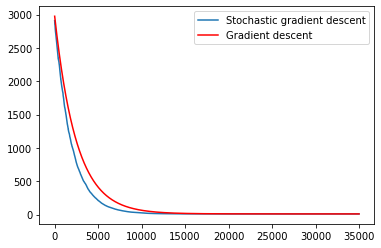

In [ ]:
plt.plot(sgd_model[1], )
plt.plot(gd_model[1], color='red')
plt.legend(labels=['Stochastic gradient descent', 'Gradient descent'])
plt.show()

Минимальная MSE (и сходимость весов) будет достигнута стохастическим градиентным спуском быстрее 

2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [ ]:
def stohastic(data, eta = 0.4, max_iter = 35000, min_weight_dist = 1e-8, 
              weight_dist = np.inf, lambda_value=0.001):
  w = np.zeros(2)
  w_list = [w.copy()]
  errors = []
  iter_num = 0
 
  np.random.seed(1234)
 
  while weight_dist > min_weight_dist and iter_num < max_iter:
    

      train_ind = np.random.randint(data.shape[0])
    
      new_w = w - 2 * eta * (np.dot(data[train_ind].T, ((np.dot(data[train_ind], w) - target[train_ind])))+ (lambda_value*w*2))  / target.shape[0] 
 
      weight_dist = np.linalg.norm(new_w - w, ord=2)
    
      w_list.append(new_w.copy())
      errors.append(mserror(data, new_w, target))
    
      iter_num += 1
      w = new_w
    
  w_list = np.array(w_list)

  return w_list, errors


In [ ]:
stohastic_with_l2 = stohastic(data)


In [ ]:
stohastic_with_l2[1][-1]

9.11118143411787

In [ ]:
def eval_model(X, y, iterations, alpha=1e-4, lambda_value=0.001):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    gd_errors = []
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        gd_errors.append(err)
        W -= (alpha * (1/n * 2 * (np.dot((y_pred - y), X.T)+(2*lambda_value*W))))

    return W, gd_errors

In [ ]:
gd_model = eval_model(data.T, target, 35000)

In [ ]:
gd_model[1][-1]

9.096280557360018

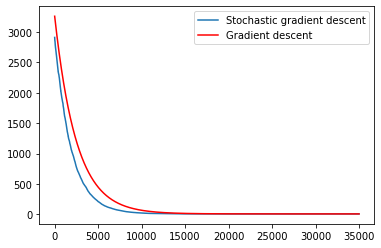

In [ ]:
plt.plot(stohastic_with_l2[1])
plt.plot(gd_model[1], color='red')
plt.legend(labels=['Stochastic gradient descent', 'Gradient descent'])
plt.show()

MSE незначительно выросла, необходимо оценивать влияние на переобучение

3. Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [ ]:
def abs_matrix(x):
  mask = (x >= 0) * 1
  mask_2= (x<0)*-1
  return mask+mask_2

In [ ]:
def stohastic(data, eta = 0.4, max_iter = 35000, min_weight_dist = 1e-8, 
              weight_dist = np.inf, lambda_value=0.001):
  w = np.zeros(2)
  w_list = [w.copy()]
  errors = []
  iter_num = 0
 
  np.random.seed(1234)
 
  while weight_dist > min_weight_dist and iter_num < max_iter:
    

      train_ind = np.random.randint(data.shape[0])
    
      new_w = w - 2 * eta * (np.dot(data[train_ind].T, ((np.dot(data[train_ind], w) - target[train_ind])))+ ((lambda_value*w)/abs_matrix(w)))  / target.shape[0] 
 
      weight_dist = np.linalg.norm(new_w - w, ord=2)
    
      w_list.append(new_w.copy())
      errors.append(mserror(data, new_w, target))
    
      iter_num += 1
      w = new_w
    
  w_list = np.array(w_list)

  return w_list, errors


In [ ]:
sgd_model_with_l1 = stohastic(data)

In [ ]:
sgd_model_with_l1[1][-1]

9.100339448258875

In [ ]:
def eval_model(X, y, iterations, alpha=1e-4, lambda_value=0.001):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    gd_errors = []
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        gd_errors.append(err)
        W -= (alpha * (1/n * 2 * (np.dot((y_pred - y), X.T)+((lambda_value*W)/abs_matrix(W)))))

    return W, gd_errors

In [ ]:
gd_model_with_l1 = eval_model(data.T, target, 35000)

In [ ]:
gd_model_with_l1[1][-1]

9.09598679014422